In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# 1) Load the dataset

In [66]:
df= pd.read_csv('employee.csv')
df.head()

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


# 2) Reset the index as name

In [35]:
df.set_index(['name'], inplace= True)
df.head()

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


# 3) Select rows for specific names Jack Morgan and Josh wills

In [36]:
df.loc[['Jack Morgan','James Authur']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
James Authur,54.0,NaN,F,Operations,G3,53


# 4) Select data for multiple values "Sales" and “Finance”.

In [37]:
gk=df.groupby('department')
sales=gk.get_group('Sales')
sales

,age,income,gender,department,grade,performance_score
name,,,,,,
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [38]:
finance= gk.get_group('Finance')
finance

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


# 5) Display employee who has more than 700 performance score

In [39]:
df[df.performance_score>700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 6) Display employee who has more than 500 and less than 700 performance score

In [40]:
score= df['performance_score'].between(500,700, inclusive= True)
df[score]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


# 7) Check and handle missing values in the dataset.


In [41]:
df.isnull().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

There are some null values at the column age, income,gender

In [42]:
mean_age= df['age'].median()
df['age'].fillna(value= mean_age, inplace= True)
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [43]:
income= df['income'].mean()
df['income'].fillna(value= income, inplace= True)
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52857.142857,NaN,Operations,G3,723
S Kumar,45.0,16000.000000,F,Finance,G0,520
Jack Morgan,32.0,35000.000000,M,Finance,G2,674
Ying Chin,45.0,65000.000000,F,Sales,G3,556
Dheeraj Patel,30.0,42000.000000,F,Operations,G2,711
Satyam Sharma,45.0,62000.000000,NaN,Sales,G3,649
James Authur,54.0,52857.142857,F,Operations,G3,53
Josh Wills,54.0,52000.000000,F,Finance,G3,901
Leo Duck,23.0,98000.000000,M,Sales,G4,709


In [44]:
df['gender'].fillna(df['gender'].mode()[0], inplace= True)

In [45]:
df.isna().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

# 8) Check the outliers and handle outliers in performance score using Percentiles.

In [53]:
Q1= df['performance_score'].quantile(0.25)
Q3= df['performance_score'].quantile(0.75)
print('25th percentile= ',Q1,'\n 75th percentile= ',Q3)


25th percentile=  556.0 
 75th percentile=  711.0


In [54]:
IQR= Q3-Q1
print('Inter Quartile Range= ',IQR)

Inter Quartile Range=  155.0


In [55]:
upp_lim= Q3+1.5*IQR
low_lim= Q1-1.5*IQR
print('upper limit= ',upp_lim,'\n Lower limit= ',low_lim)

upper limit=  943.5 
 Lower limit=  323.5


In [57]:
df['performance_score']>upp_lim

name
Allen Smith      False
S Kumar          False
Jack Morgan      False
Ying Chin        False
Dheeraj Patel    False
Satyam Sharma    False
James Authur     False
Josh Wills       False
Leo Duck         False
Name: performance_score, dtype: bool

In [58]:
df['performance_score']<low_lim

name
Allen Smith      False
S Kumar          False
Jack Morgan      False
Ying Chin        False
Dheeraj Patel    False
Satyam Sharma    False
James Authur      True
Josh Wills       False
Leo Duck         False
Name: performance_score, dtype: bool

Here there is a score that is lower than lower limit, hence outlier detected.

In [60]:
new_df= df[(df.performance_score>low_lim) & (df.performance_score<upp_lim)]
new_df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52857.142857,F,Operations,G3,723
S Kumar,45.0,16000.000000,F,Finance,G0,520
Jack Morgan,32.0,35000.000000,M,Finance,G2,674
Ying Chin,45.0,65000.000000,F,Sales,G3,556
Dheeraj Patel,30.0,42000.000000,F,Operations,G2,711
Satyam Sharma,45.0,62000.000000,F,Sales,G3,649
Josh Wills,54.0,52000.000000,F,Finance,G3,901
Leo Duck,23.0,98000.000000,M,Sales,G4,709


{'whiskers': [<matplotlib.lines.Line2D at 0x181431d15b0>,
 'caps': [<matplotlib.lines.Line2D at 0x181431d1c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x181431d1220>],
 'medians': [<matplotlib.lines.Line2D at 0x181431dd370>],
 'fliers': [<matplotlib.lines.Line2D at 0x181431dd6d0>],
 'means': []}

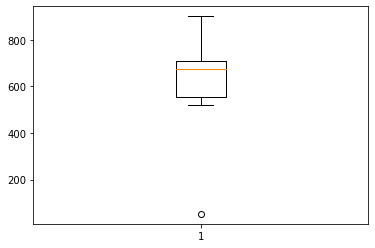

In [64]:
plt.boxplot(df['performance_score'])

# 9) Check the gender column and do Dummy encoding.

In [67]:
df_dummy= pd.get_dummies(df['gender'],drop_first= True)
df_dummy

,M
0,0
1,0
2,1
3,0
4,0
5,0
6,0
7,0
8,1


# 10)Do the standard scaling on the feature performance score.

In [83]:
reshape_score =df['performance_score'].values.reshape(-1,1)
reshape_score

array([[723],
       [520],
       [674],
       [556],
       [711],
       [649],
       [ 53],
       [901],
       [709]], dtype=int64)

In [84]:
scaler= StandardScaler()

In [85]:
scaled= scaler.fit_transform(reshape_score)
print(scaled)

[[ 0.5055651 ]
 [-0.40805254]
 [ 0.2850367 ]
 [-0.24603168]
 [ 0.45155814]
 [ 0.17252221]
 [-2.50982316]
 [ 1.30666824]
 [ 0.44255698]]


In [87]:
scaled.mean().round()

0.0

In [88]:
scaled.std().round()

1.0